In [84]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import glob
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [85]:
class CustomDataset(Dataset):
    def __init__(self):
        # Defining pathname to images
        self.imgs_path = "./Characters/"
        
        # Find all relevant files to dataset
        file_list = glob.glob(self.imgs_path + "*")
        
        # Create an empty array in which the file names can be stored
        self.data = []
        
        # Appending each file name to the data array
        for img_path in file_list:
            self.data.append(img_path)
       
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        # Making it such that an image can be accessed with an index
        img_path = self.data[idx]
        
        # Reading in the image
        img = cv2.imread(img_path)
        
        # cv2 automatically structures images as BGR. Therefore we have to manually convert images back to RGB
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        # PyTorch requires data to be tensors. The from_numpy function converts numpy array into tensors automatically
        img_tensor = torch.from_numpy(img)
        
        # Torch requires images to be in channel first format. Numpy stores this information as (W, H, CH)
        # We permute this such that the information is now structured as (CH, W, H)
        img_tensor = img_tensor.permute(2, 0, 1)
        return img_tensor
            

In [89]:
# Storing our custom data in a variable dataset
dataset = CustomDataset()

# Using the Torch data loader to batch and shuffle our data
data_loader = DataLoader(dataset, batch_size=128, shuffle=True)

In [90]:
# Function for displaying images
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))
    plt.show()

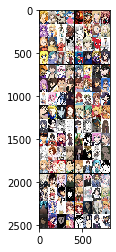

In [91]:
# Proving to ourselves that our data has been loaded and can be displayed in a batch
data_iter = iter(data_loader)
images = data_iter.next()
imshow(torchvision.utils.make_grid(images))

In [94]:
arr = np.array(cv2.imread("./Characters/character1"))

In [97]:
arr.shape

(156, 100, 3)